### Import AIDC library and requirements

In [12]:
import aidc
import pandas as pd
import matplotlib.pyplot as plt
import io

### Load the dataset from the csv file and create AIDC model

In [13]:
df = pd.read_csv("../data/credit_human_ml.csv", sep=",",nrows=5500)

table = aidc.load_pandas_data(df)
taskmodel_data={
  'id': "0",
  'name': "taskModel",
  'description': "AIDC sample"
}

taskmodel=aidc.create_task_model(table,taskmodel_data)

### Analyze the model using default performance model

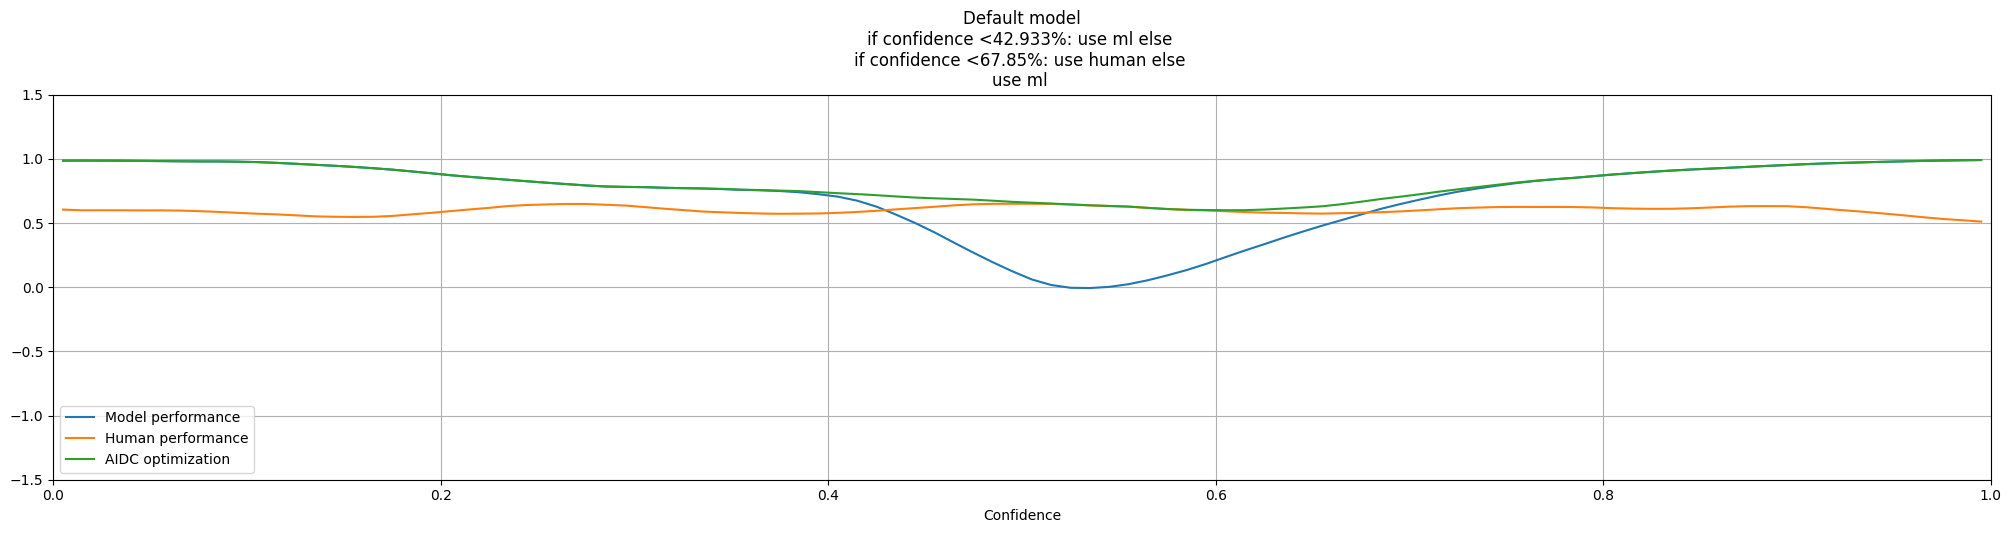

In [14]:
#Show default statistics
curves=aidc.get_curves(taskmodel)
dispatch_description=aidc.get_dispatch_description(taskmodel)
    
df = pd.read_csv(io.StringIO(curves),sep='\t')
min_values=df.min()
max_values=df.max()
margin_factor=1.5
min_performance=min(min_values[df.columns[df.columns.str.contains('performance')]])
if -1 < min_performance < 1:
    min_performance = -1
max_performance=max(max_values[df.columns[df.columns.str.contains('performance')]])
if -1 < max_performance < 1:
    max_performance = 1
min_limit=min_performance * margin_factor
max_limit=max_performance * margin_factor
df.plot(title="Default model" +"\n" + dispatch_description ,xlabel="Confidence",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","initial scenario weighted average performance"],ylim=[min_limit,max_limit],xlim=[0,1],figsize=(25, 5),grid=True)
plt.legend(["Model performance", "Human performance", "AIDC optimization"])
plt.show() 

### Analyze the model using custom performance model

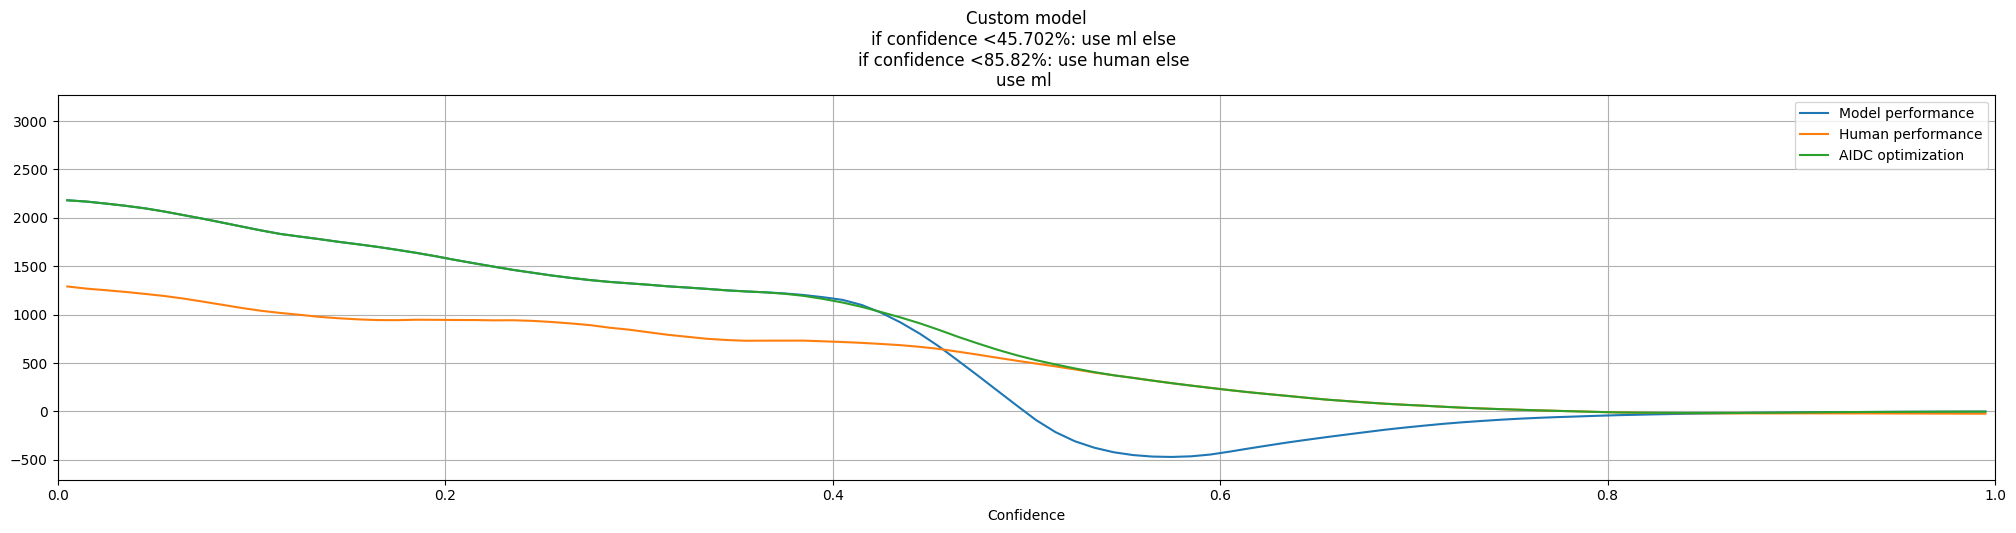

In [15]:
#Configure performance model
######################## Edit the values for your custom performance model. ############################
TruePositiveCost = "0"
FalsePositiveCost = "-LoanAmount*0.3"
FalseNegativeCost = "-(LoanAmount/LoanDuration)"
TrueNegativeCost = "LoanAmount*0.3"
ModelDecisionCost = "-0.1"
HumanDecisionCost = "-10"
#################################################################################################

aidc.set_custom_indicators(taskmodel, TruePositiveCost, FalsePositiveCost, FalseNegativeCost, TrueNegativeCost, ModelDecisionCost, HumanDecisionCost)
curves=aidc.get_curves(taskmodel)
df = pd.read_csv(io.StringIO(curves),sep='\t')
dispatch_description=aidc.get_dispatch_description(taskmodel)

min_values=df.min()
max_values=df.max()
margin_factor=1.5
min_performance=min(min_values[df.columns[df.columns.str.contains('performance')]])
if -1 < min_performance < 1:
    min_performance = -1
max_performance=max(max_values[df.columns[df.columns.str.contains('performance')]])
if -1 < max_performance < 1:
    max_performance = 1
min_limit=min_performance * margin_factor
max_limit=max_performance * margin_factor
df.plot(title="Custom model" +"\n" + dispatch_description ,xlabel="Confidence",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","initial scenario weighted average performance"],ylim=[min_limit,max_limit],xlim=[0,1],figsize=(25, 5),grid=True)
plt.legend(["Model performance", "Human performance", "AIDC optimization"])
plt.show()

### Calculate the improvements introduced by using AI

Total improvement:  811381  over  4864  operations


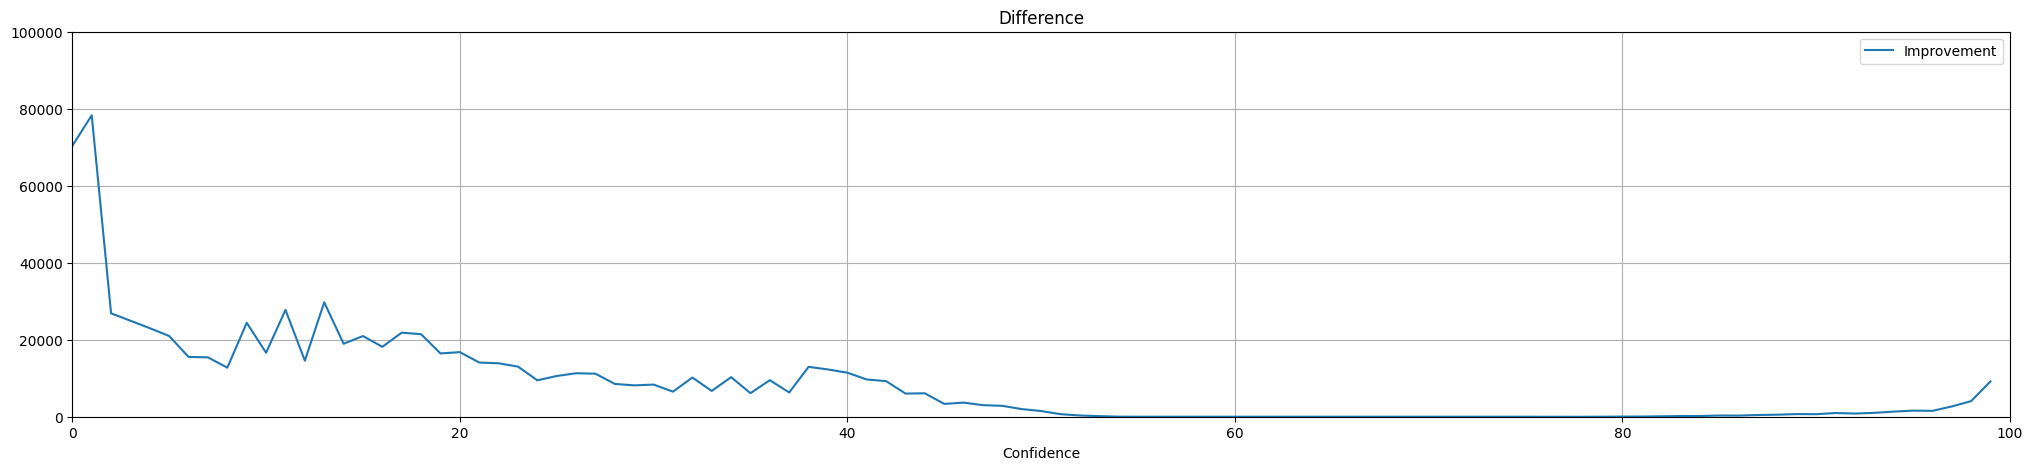

In [16]:
improvements = aidc.calculate_improvements(taskmodel)
df = pd.DataFrame(improvements)

print("Total improvement: " , round(df['Improvement'].sum()), " over ", df['Count'].sum(), " operations")
df.plot(title='Difference',xlabel="Confidence" ,y=["Improvement"],ylim=[0,100000],xlim=[0,100],figsize=(25, 5),grid=True)
plt.show() 

### Export the AIDC model as JSON

In [17]:
## Export the most optimal model to JSON
import json
model_export=aidc.export_model(taskmodel)

json_object=json.dumps(model_export.valueOf(),indent=4)
## Save the most optimal AIDC rules
with open("AIDC.json", "w") as outfile:
    outfile.write(json_object)

### Experiment with attributes

if CreditHistory=credits_paid_to_date: 
	if LoanDuration=4: 
		if confidence <60.469%: use human else 
		if confidence <76.548%: use ml else 
		if confidence <84.932%: use human else 
		use ml 
	if LoanDuration=5: use ml 
	if LoanDuration=6: use ml 
	if LoanDuration=7: use ml 
	if LoanDuration=8: use ml 
	if LoanDuration=9: use human 
	if LoanDuration=10: use human 
	if LoanDuration=11: use ml 
	if LoanDuration=12: use human 
	if LoanDuration=13: use human 
	if LoanDuration=14: use human 
	if LoanDuration=15: 
		if confidence <40.597%: use ml else 
		if confidence <74.912%: use human else 
		use ml 
	if LoanDuration=16: 
		if confidence <84.579%: use human else 
		use ml 
	if LoanDuration=17: 
		if confidence <40.54%: use ml else 
		if confidence <85.651%: use human else 
		use ml 
	if LoanDuration=18: use human 
	if LoanDuration=19: 
		if confidence <42.132%: use ml else 
		if confidence <81.434%: use human else 
		use ml 
	if LoanDuration=20: 
		if confidence <40.453%: use ml else 
	

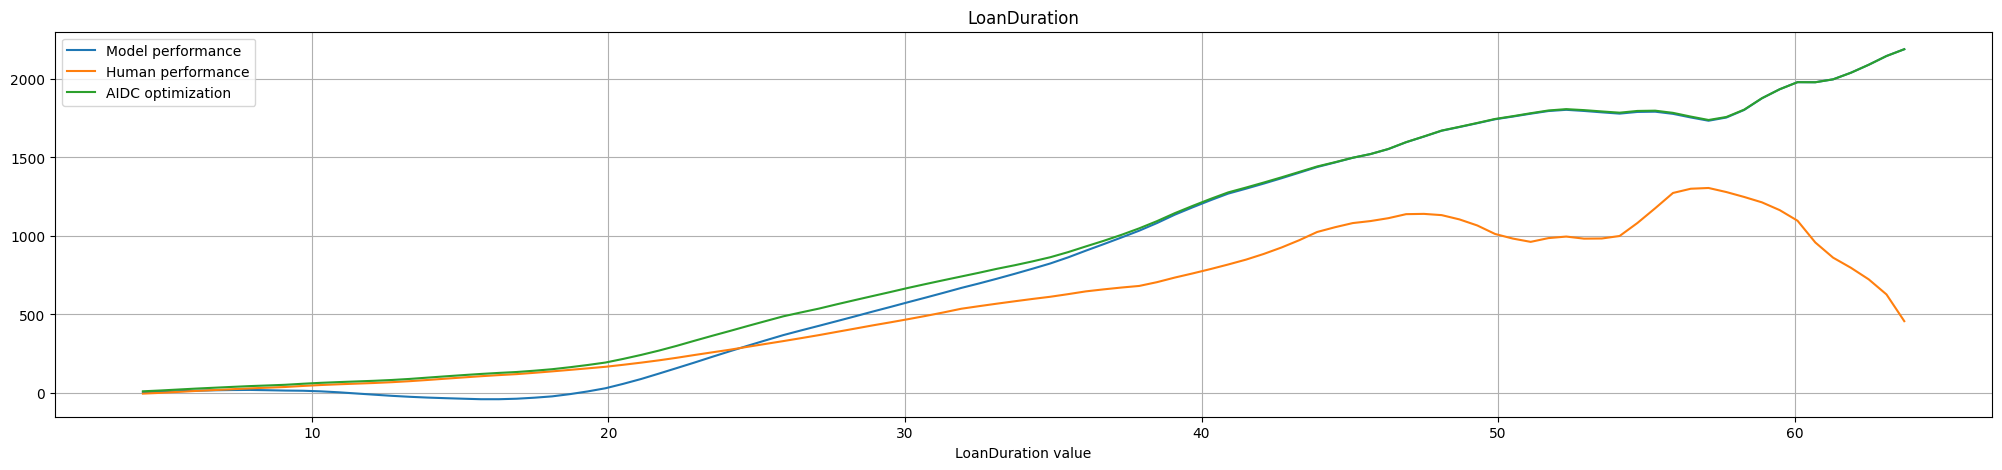

In [18]:
human_tool=aidc.get_human_tool(taskmodel)
ml_tool=aidc.get_ml_tool(taskmodel)
selectedAttributes=["CreditHistory","LoanDuration"]
attribute_for_chart=selectedAttributes[1]

new_scenario=aidc.create_scenario(
    taskmodel,
    name="attributes",
    description="attributes scenario",
    decision_tools=[human_tool, ml_tool],
    selected_attributes=selectedAttributes
);

new_curves=aidc.get_curves(taskmodel,new_scenario,attribute_for_chart)
dispatch_description=aidc.get_dispatch_description(taskmodel,new_scenario)

if new_curves:
    df=pd.read_csv(io.StringIO(new_curves),sep='\t')
    df.plot(title=attribute_for_chart ,xlabel=attribute_for_chart+" value",x="Unnamed: 0",y=["ml weighted average performance","human weighted average performance","attributes scenario weighted average performance"],figsize=(25, 5),grid=True)
    plt.legend(["Model performance", "Human performance", "AIDC optimization"])

print(dispatch_description)